In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
x = np.array([[2,3,4,5]], dtype='float')
x = tf.convert_to_tensor(x)

In [ ]:
y = tf.nn.softmax(x)
print(y)

tf.Tensor([[0.0320586  0.08714432 0.23688282 0.64391426]], shape=(1, 4), dtype=float64)


In [ ]:
print(type(y))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
print(sum(y.numpy()[0]))

1.0


In [ ]:
fashionmnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = fashionmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.nn.relu ),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy")

In [ ]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4938
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3118
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2935
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2801
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2665
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2581
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2495
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2404
Epoch 11/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2314
Epoch 12/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2248
E

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3608


0.36083438992500305

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 960us/step


In [ ]:
dict = {0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandals",6:"Shirt",7:"Sneakers",8:"Bag",9:"Ankle boots"}
outcomes = [0,1,2,3,4,5,6,7,8,9]
import math

[2.4966568e-05 2.7083742e-09 6.0968112e-02 1.4294441e-09 8.6604542e-01
 3.7796921e-09 7.2961435e-02 3.5842726e-12 7.2959132e-11 9.2533159e-10]
0.8660454
real :  Coat


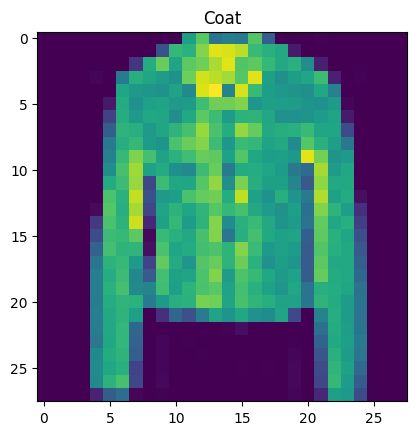

In [ ]:
import matplotlib.pyplot as plt
index1 = 10
plt.imshow(test_images[index1])
print(predictions[index1])
pos = np.where(predictions[index1] == np.max(predictions[index1]))
plt.title(dict[pos[0][0]])
print((max(predictions[index1])))
print("real : ",str(dict[test_labels[index1]]))

In [ ]:
model1 = keras.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(units = 128,activation=tf.nn.relu),
    keras.layers.Dense(units = 10, activation = tf.nn.softmax)
])

In [ ]:
model1.compile( optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy')

In [ ]:
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.4423
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2917
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2477
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2157
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1889
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1661
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1457
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1268
Epoch 9/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1123
Epoch 10/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0977


In [ ]:
model1.evaluate(train_images, train_labels)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0765


0.07650177925825119

In [ ]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.2996


0.29962486028671265